In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_price.csv to house_price.csv


In [ ]:
df= pd.read_csv("house_price.csv")
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [ ]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


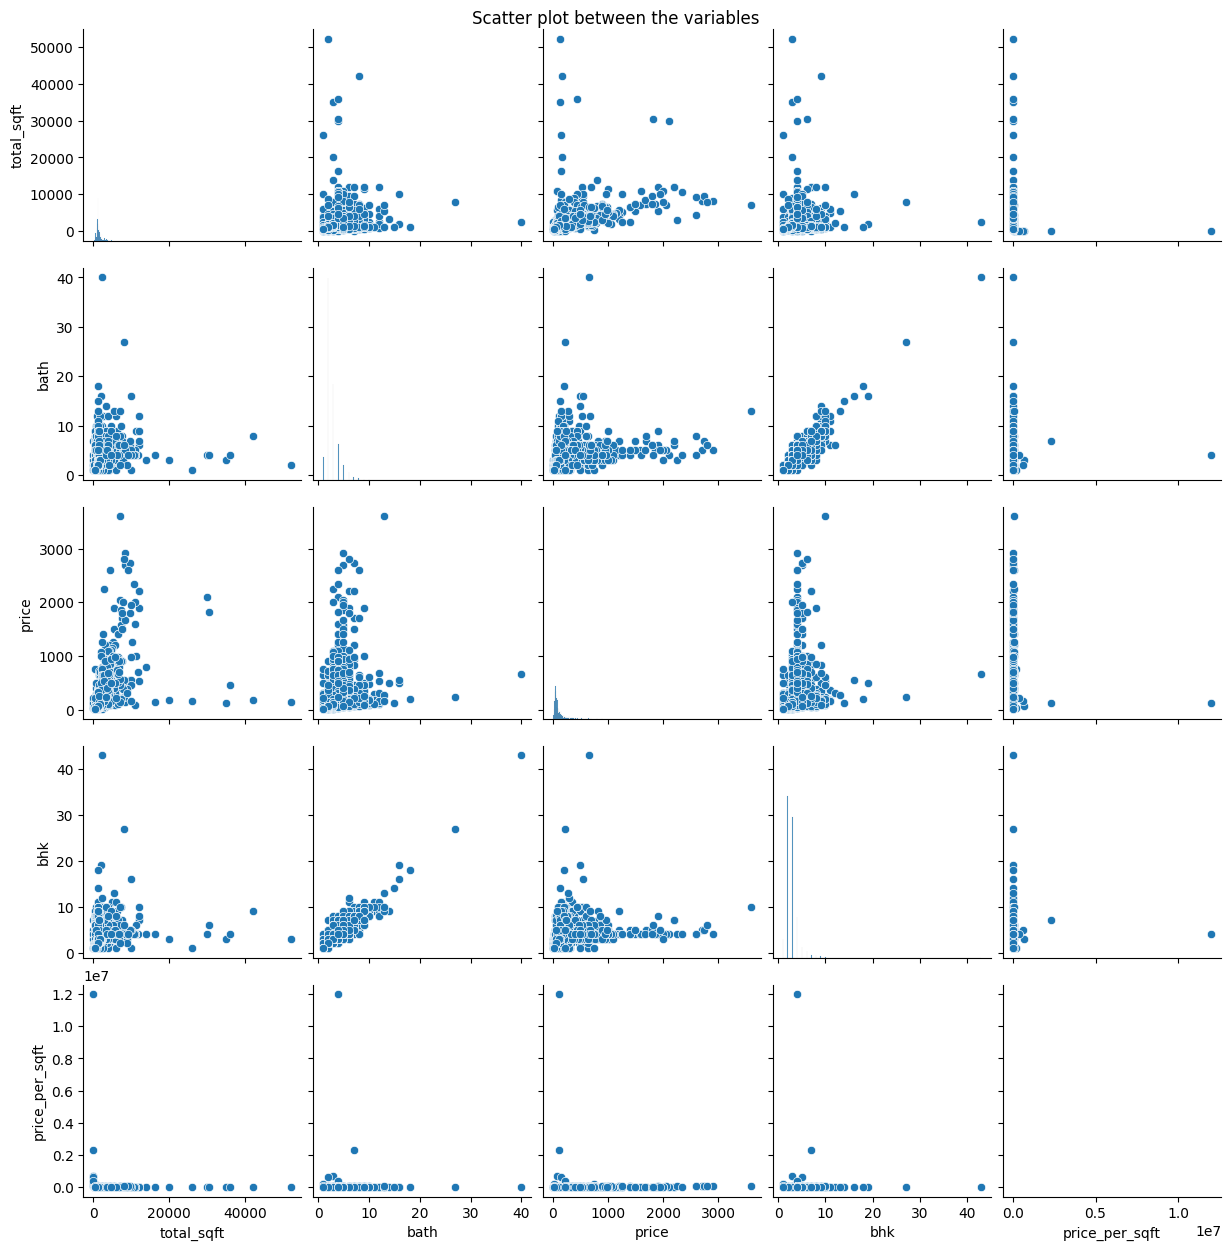

In [ ]:
#Scatter plot between the variables to check the correlation between them.#
sns.pairplot(df)
plt.suptitle("Scatter plot between the variables",y=1)
plt.show()

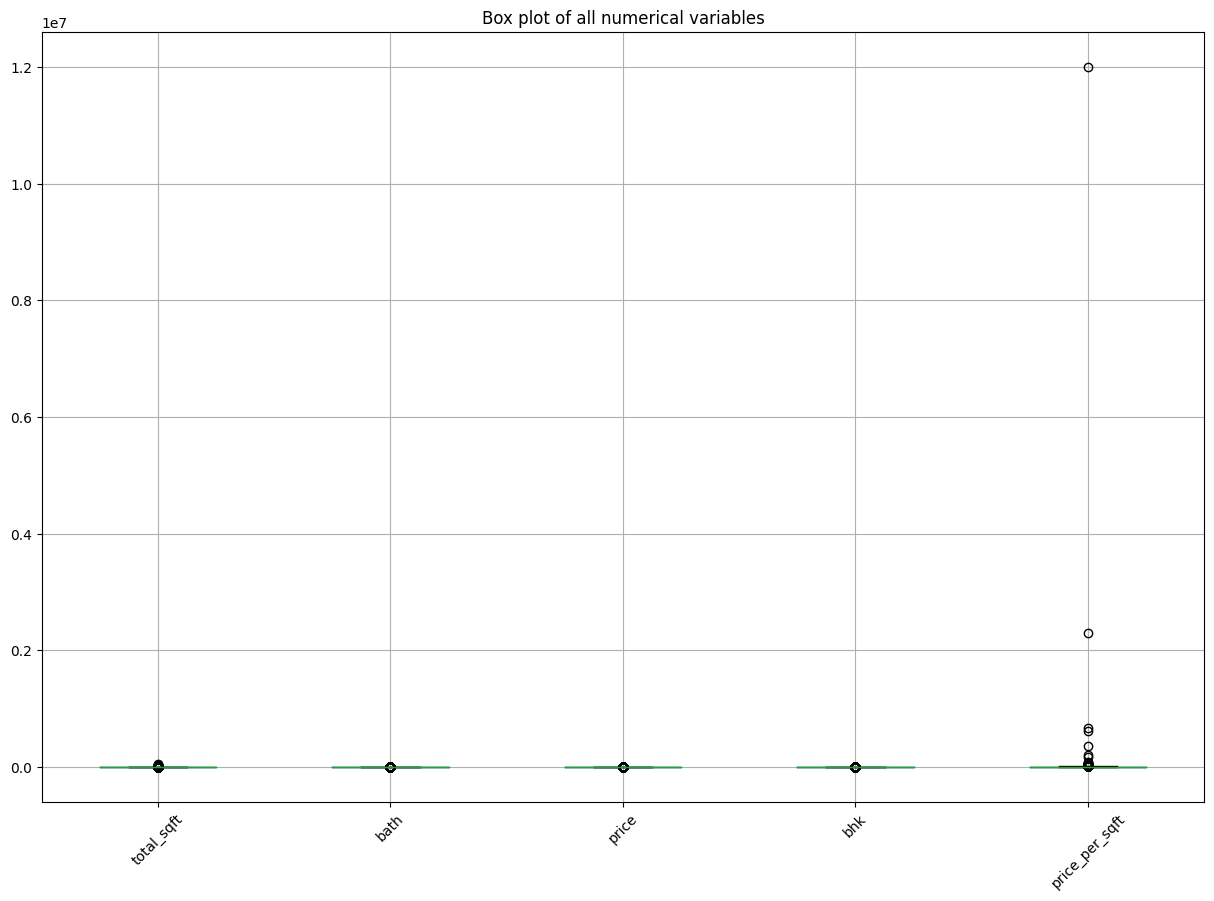

In [ ]:
# Box plot for all numerical columns
plt.figure(figsize=(15,10))
df.boxplot()
plt.xticks(rotation=45)
plt.title("Box plot of all numerical variables")
plt.show()

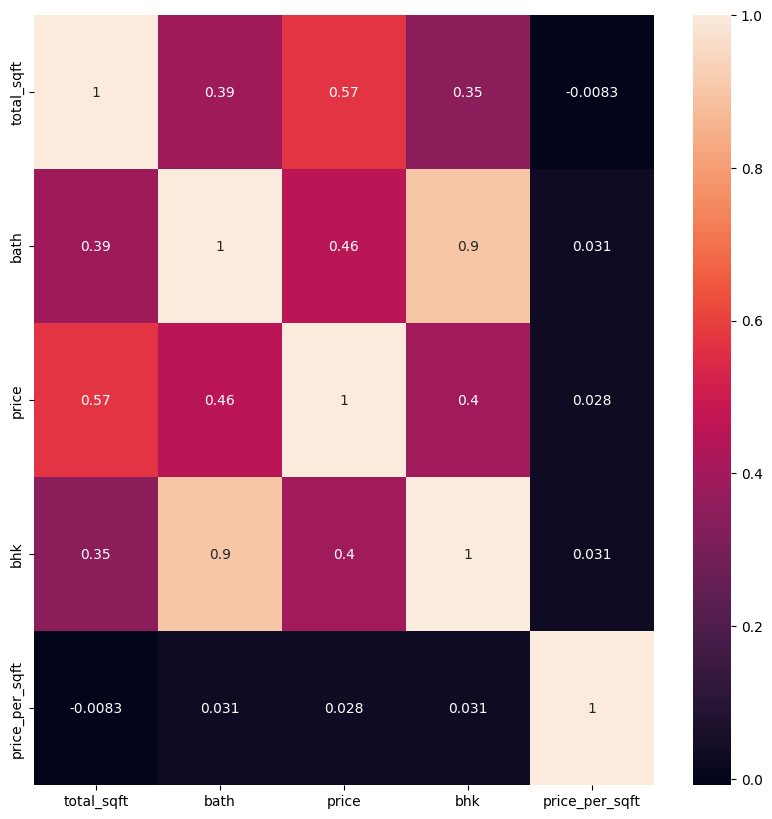

In [ ]:
# check correlation between all the numerical columns and plot heatmap.
numerical_df=df.select_dtypes(include=np.number)
correlation =numerical_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation,annot=True)
plt.show()

### **Detect outliers**

<ipython-input-9-03a688873ccd>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price_per_sqft'])


<Axes: xlabel='price_per_sqft', ylabel='Density'>

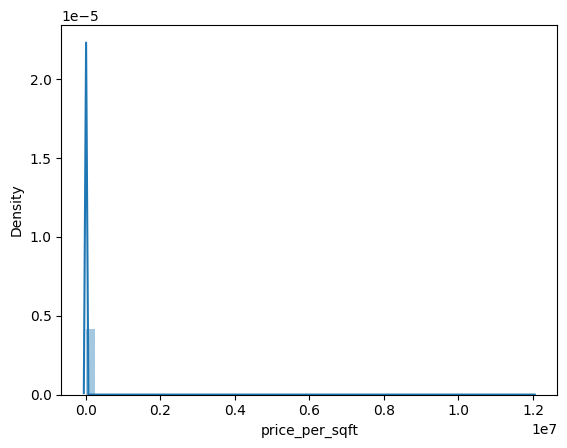

In [ ]:
sns.distplot(df['price_per_sqft'])

# **To Remove Outliers**

Method 1
#Mean Function

In [ ]:
df_mean=df['price_per_sqft'].mean()
df_mean

7920.336742424242

Method 2
# Percentile

In [ ]:
lower_percentile=0.05
upper_percentile=0.95
# calculate the lower and upper limit
lower_limit = df['price_per_sqft'].quantile(lower_percentile)
upper_limit = df['price_per_sqft'].quantile(upper_percentile)
print('lower limit:',lower_limit)
print('upper_limit:',upper_limit)

lower limit: 3107.8500000000004
upper_limit: 15312.099999999984


In [ ]:
# Filter the data by removing outliers
df_new= df[(df['price_per_sqft'] > lower_limit) & (df['price_per_sqft'] < upper_limit)]
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_new)}")

Number of rows before removing outliers: 13200
Number of rows after removing outliers: 11880


In [ ]:
# print outliers
outliers = df[~df['price_per_sqft'].between(lower_limit, upper_limit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
20,Kengeri,1 BHK,600.0,1.0,15.0,1,2500
41,Sarjapur Road,3 BHK,1254.0,3.0,38.0,3,3030
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
...,...,...,...,...,...,...,...
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666


<Axes: ylabel='price_per_sqft'>

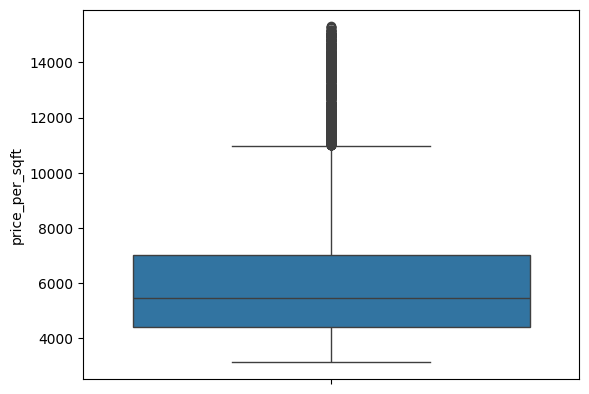

In [ ]:
sns.boxplot(df_new['price_per_sqft'])


In [ ]:
mean=df_new['price_per_sqft'].mean()
mean

6134.52138047138

method 3
# Inter Quartile Range Method

In [ ]:
# calculate the first and second quartile and IQR
q1=df['price_per_sqft'].quantile(0.25)
q3=df['price_per_sqft'].quantile(0.75)
print('q1:',q1)
print('q3:',q3)
iqr=q3-q1
print('iqr:',iqr)

q1: 4267.0
q3: 7317.0
iqr: 3050.0


In [ ]:
# define upper and lower limit
lower_limit=q1-1.5*iqr
upper_limit=q3+1.5*iqr
print('lower limit:',lower_limit)
print('upper_limit:',upper_limit)

lower limit: -308.0
upper_limit: 11892.0


In [ ]:
new_df=df[(df['price_per_sqft']>lower_limit)&(df['price_per_sqft']<upper_limit)]
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(new_df)}")
print(f"Number of outliers: {len(df)-len(new_df)}")

Number of rows before removing outliers: 13200
Number of rows after removing outliers: 11935
Number of outliers: 1265


In [ ]:
# show outliers
outliers = df[~df['price_per_sqft'].between(lower_limit, upper_limit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
48,KR Puram,2 Bedroom,800.0,1.0,130.0,2,16250
...,...,...,...,...,...,...,...
13142,other,2 BHK,1140.0,1.0,185.0,2,16228
13157,other,7 Bedroom,1400.0,7.0,218.0,7,15571
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083


Method 4
#Z-score method

In [ ]:
# calculate mean and std of price per sqft
mean=df['price_per_sqft'].mean()
std=df['price_per_sqft'].std()
print('mean:',mean)
print('std:',std)

mean: 7920.336742424242
std: 106727.16032810867


In [ ]:
# calculate lower and upper limit
lower_limit=mean-3*std
upper_limit=mean+3*std
print('lower limit:',lower_limit)
print('upper_limit:',upper_limit)

lower limit: -312261.14424190175
upper_limit: 328101.8177267502


In [ ]:
new1_df=df[(df['price_per_sqft']>lower_limit)&(df['price_per_sqft']<upper_limit)]
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(new1_df)}")
print(f"Number of outliers: {len(df)-len(new1_df)}")

Number of rows before removing outliers: 13200
Number of rows after removing outliers: 13195
Number of outliers: 5


In [ ]:
outliers = df[~df['price_per_sqft'].between(lower_limit, upper_limit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000
11447,Whitefield,4 Bedroom,60.0,4.0,218.0,4,363333


<Axes: ylabel='price_per_sqft'>

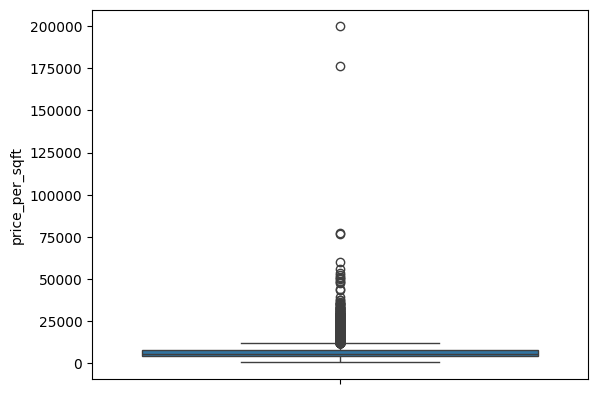

In [ ]:
# boxplot afterremoval of outliers
sns.boxplot(new1_df['price_per_sqft'])